In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
X=x_test
Y=y_test

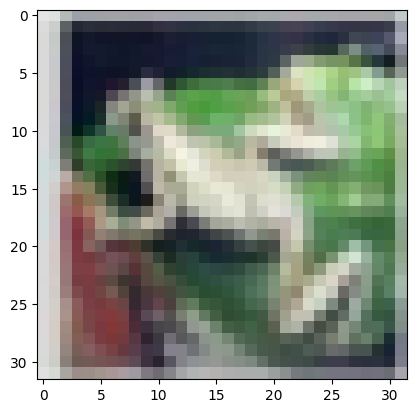

Số này là: [6]


In [ ]:
import matplotlib.pyplot as plt
things = x_train[35278]
plt.imshow(things, cmap = plt.cm.binary)
plt.show()
print('Số này là:',y_train[35278])

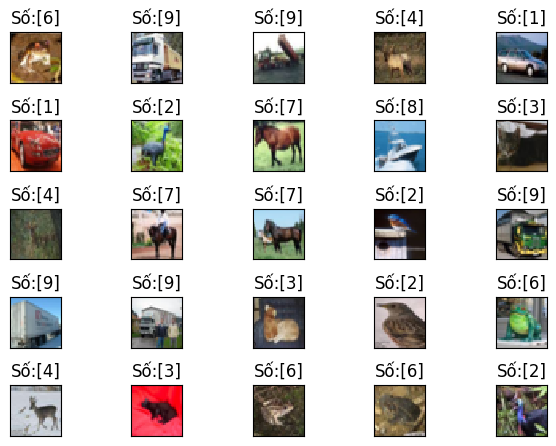

In [ ]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',
             interpolation='none')
  plt.title('Số:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
x_train = x_train.reshape(50000,32,32,3)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000,32,32,3)
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers.core.activation import Activation
from keras.callbacks import optimizer
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Normalization, LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape= (32,32,3),padding='same'))
model.add(Dropout(0,25))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0,25))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0,25))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0,25))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 1.3636 - accuracy: 0.5072
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9457 - accuracy: 0.6684
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7812 - accuracy: 0.7265
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6771 - accuracy: 0.7645
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5856 - accuracy: 0.7966
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5094 - accuracy: 0.8218
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4388 - accuracy: 0.8466
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3801 - accuracy: 0.8649
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3224 - accuracy: 0.8855
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2

In [ ]:
test = model.evaluate(x_test,y_test,verbose=0)
print('Tess lost:',test[0])
print('Test accuracy:',test[1])

Tess lost: 1.681292176246643
Test accuracy: 0.7360000014305115
